# Analysis of Titanic Data

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Importation of Data 


Importation des données et separation pour meilleur analyse


In [3]:

titanic = []
with open('titanic.csv', newline='') as csvfile: 
    reader = csv.DictReader(csvfile) #Première ligne avec le noms des variables 
    for i, row in enumerate(reader,start=1) :  # 1 pour ne pas prendre le header en compte 
        survived = int(row['Survived']) # 0 = No, 1 = Yes
        pclass = float(row['Pclass']) #	1 = 1st, 2 = 2nd, 3 = 3rd
        sex = 0 if row['Sex'] == 'female' else 1
        age = float(row['Age']) 
        sibsp = int(row['Siblings/Spouses Aboard']) #Siblings and spouses 
        parch = int(row['Parents/Children Aboard']) # Parents and children 
        fare = float(row['Fare'])
        titanic.append([survived,pclass,sex,age,sibsp,parch,fare]) 
titanic = np.array(titanic)
print(titanic.shape)
n,p = titanic.shape
#Affectation de chaque colonne à une variable pour mieux analyser
survie = titanic[:,0]
pclass = titanic[:,1]
sex = titanic[:,2]
age = titanic[:,3]
sibsp = titanic[:,4]
parch = titanic[:,5]
fare = titanic[:,6]
#Variables X d'étude 
X =  titanic[:,1:]
y = survie

(887, 7)


### **Description de la variable 'age'**

Text(0.5, 1.0, 'Comparaison des âges : passagers décédés vs survivants')

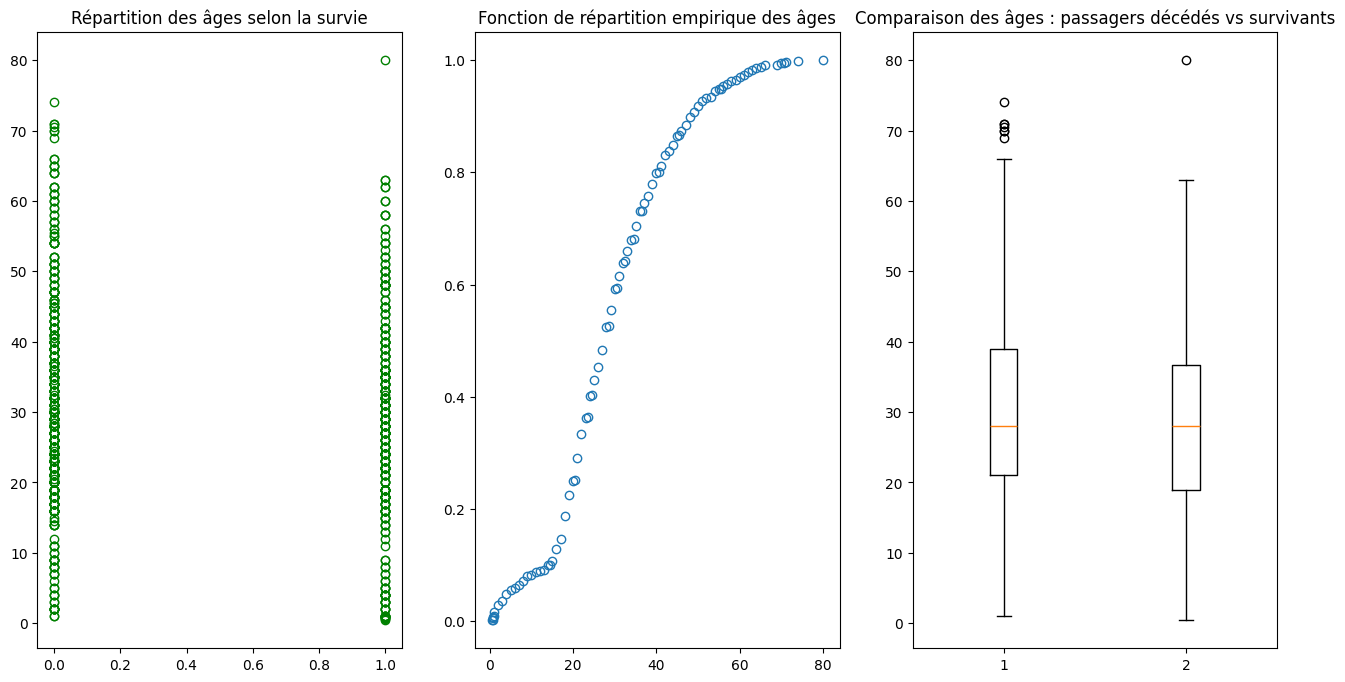

In [4]:
fig =plt.figure(figsize=(16, 8))
ax1 = plt.subplot(1,3,1)
plt.plot(survie,age,'o',mfc = 'none',color = 'green') # La survie en focntion de l'age
mod_age,eff_age = np.unique(age,return_counts=True)
f_cum_age = np.cumsum(eff_age / np.sum(eff_age))
ax2 =plt.subplot(1,3,2)
plt.plot(mod_age,f_cum_age,'o',mfc = 'none') #fonction empirique sur laquelle on voit qu''il y a un acroisement lent pour l'age entre 0 et 15
ages_morts = age[survie==0]
ages_vivant = age[survie==1]
ax3 =plt.subplot(1,3,3)
plt.boxplot([ages_morts,ages_vivant])

#Ajout de ritre 

ax1.set_title("Répartition des âges selon la survie")
ax2.set_title("Fonction de répartition empirique des âges")
ax3.set_title("Comparaison des âges : passagers décédés vs survivants")

Text(0.5, 1.0, "Histogramme de la survie en fonction de l'age")

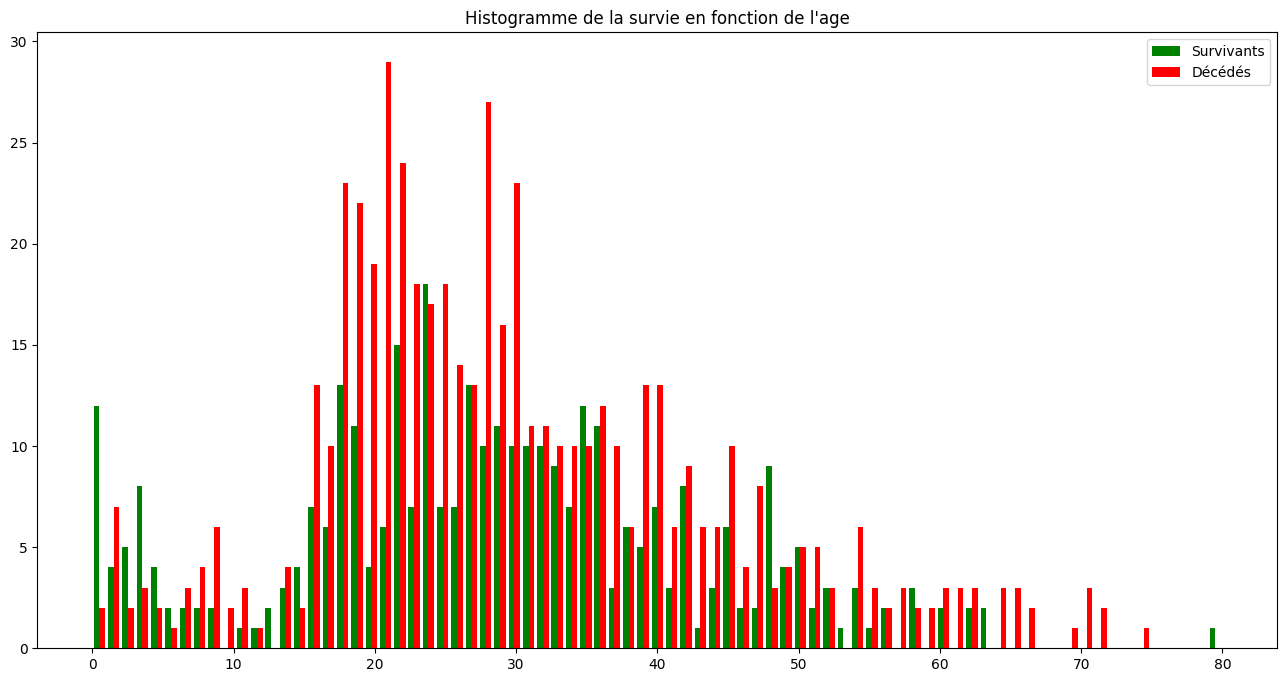

In [5]:
bins = np.linspace(0, 80, 80)  #un bin pour chaque age
plt.figure(figsize=(16, 8))
plt.hist([ages_vivant,ages_morts], 
         bins=bins, 
         color=['green', 'red'],
         label=['Survivants','Décédés']);
plt.legend()
plt.title("Histogramme de la survie en fonction de l'age")

##### Manquants

- Moyenne, médiane, écart-type de age, ages_vivant et ages_morts

In [6]:
print("Âge moyen des survivants :", np.mean(ages_vivant))
print("Âge moyen des morts :", np.mean(ages_morts))
print("Médiane âge survivants :", np.median(ages_vivant))


Âge moyen des survivants : 28.408391812865496
Âge moyen des morts : 30.13853211009174
Médiane âge survivants : 28.0


### **Description variable 'sex'**

Rapport morts/vivants chez les hommes:  4.256880733944954
Rapport morts/vivants chez les femmes:  0.34763948497854075


Text(0.5, 1.0, 'Femmes/Hommes vivants')

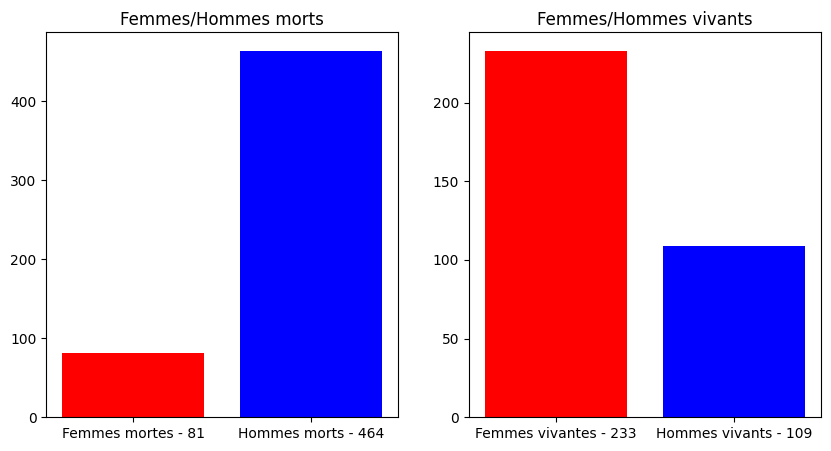

In [7]:
femmes = sex == 0
hommes = sex == 1
vivants = survie == 1
morts = survie == 0
# Groupes
femmes_mortes = titanic[np.logical_and(femmes, morts)]
femmes_vivantes = titanic[np.logical_and(femmes,vivants)]
hommes_morts = titanic[np.logical_and(hommes,morts)]
hommes_vivants = titanic[np.logical_and(hommes,vivants)]

nb_femmes_mortes = len(femmes_mortes)
nb_hommes_morts = len(hommes_morts)
nb_femmes_vivantes = len(femmes_vivantes)
nb_hommes_vivants = len(hommes_vivants)

print('Rapport morts/vivants chez les hommes: ',nb_hommes_morts/nb_hommes_vivants)
print('Rapport morts/vivants chez les femmes: ',nb_femmes_mortes/nb_femmes_vivantes)

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1)
plt.bar([f'Femmes mortes - {nb_femmes_mortes}', f'Hommes morts - {nb_hommes_morts}'], [nb_femmes_mortes, nb_hommes_morts], color=['red', 'blue'])
ax2 = plt.subplot(1,2,2)
plt.bar([f'Femmes vivantes - {nb_femmes_vivantes}', f'Hommes vivants - {nb_hommes_vivants}'], [nb_femmes_vivantes, nb_hommes_vivants], color=['red', 'blue'])

#Ajout des titres 
ax1.set_title('Femmes/Hommes morts')
ax2.set_title('Femmes/Hommes vivants')


### **Description variable 'pclass'**

Rapport morts/vivants en premiere classe  0.5882352941176471
Rapport morts/vivants en deuxieme classe:  1.1149425287356323
Rapport morts/vivants en troisieme classe:  3.092436974789916


<BarContainer object of 3 artists>

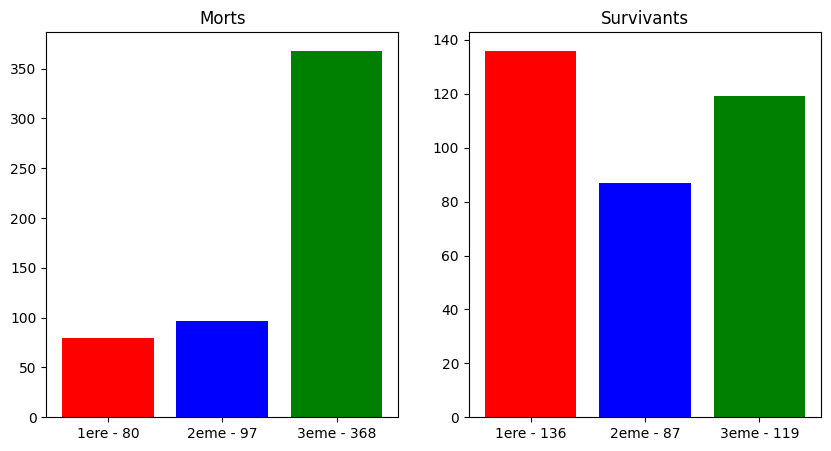

In [8]:
premiere = pclass == 1
deuxieme = pclass == 2
troisieme = pclass == 3

morts_premiere = titanic[np.logical_and(premiere,morts)]
vivants_premiere = titanic[np.logical_and(premiere,vivants)]
morts_deuxieme = titanic[np.logical_and(deuxieme,morts)]
vivants_deuxieme = titanic[np.logical_and(deuxieme,vivants)]
morts_troisieme = titanic[np.logical_and(troisieme,morts)]
vivants_troisieme = titanic[np.logical_and(troisieme,vivants)]

nb_premiere_morts = len(morts_premiere)
nb_deuxieme_morts = len(morts_deuxieme)
nb_troisieme_morts = len(morts_troisieme)
nb_premiere_vivants = len(vivants_premiere)
nb_deuxieme_vivants = len(vivants_deuxieme)
nb_troisieme_vivants = len(vivants_troisieme)

print('Rapport morts/vivants en premiere classe ',nb_premiere_morts/nb_premiere_vivants)
print('Rapport morts/vivants en deuxieme classe: ',nb_deuxieme_morts/nb_deuxieme_vivants)
print('Rapport morts/vivants en troisieme classe: ',nb_troisieme_morts/nb_troisieme_vivants)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Morts')
plt.bar([f'1ere - {nb_premiere_morts}', f'2eme - {nb_deuxieme_morts}', f'3eme - {nb_troisieme_morts}'], [nb_premiere_morts, nb_deuxieme_morts,nb_troisieme_morts], color=['red', 'blue','green'])
plt.subplot(1,2,2)
plt.title('Survivants')
plt.bar([f'1ere - {nb_premiere_vivants}', f'2eme - {nb_deuxieme_vivants}', f'3eme - {nb_troisieme_vivants}'], [nb_premiere_vivants, nb_deuxieme_vivants,nb_troisieme_vivants], color=['red', 'blue','green'])

#### Manquant 

-  Taux de survie en première...
taux_survie_premiere = nb_premiere_vivants / (nb_premiere_morts + nb_premiere_vivants)

### **Etude des variables sibsp et parch**

Pourcentage pour 0.0 parch:  34.57  %
Pourcentage pour 1.0 parch:  55.08  %
Pourcentage pour 2.0 parch:  50.0  %
Pourcentage pour 3.0 parch:  60.0  %
Pourcentage pour 4.0 parch:  0.0  %
Pourcentage pour 5.0 parch:  20.0  %
Pourcentage pour 6.0 parch:  0.0  %


Text(0.5, 1.0, 'Pourcentage de survie par rapport aux nombres de parents et enfants ')

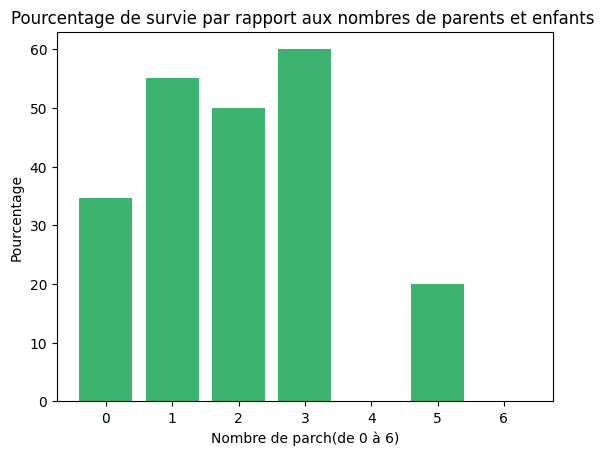

In [9]:
#Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs parents ou enfants à bord
mod_parch = np.unique(parch)
taux_survie_par_parch = {}

for mod in mod_parch:
    total_mod = titanic[parch == mod]
    survivants_mod = titanic[np.logical_and(parch == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_parch[mod] = taux
    print('Pourcentage pour' ,mod, 'parch: ',round(taux_survie_par_parch[mod],2), ' %')
 
plt.bar(mod_parch, taux_survie_par_parch.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de parch(de 0 à 6)')
plt.xticks(np.arange(7));
plt.title('Pourcentage de survie par rapport aux nombres de parents et enfants ')
# on voit par exemple que lorsqu'un passager a 3 enfants et parents au total son chance de survie est de 60%

Interprétation :

On observe que les passagers avec 1 à 3 proches (parch) ont des taux de survie supérieurs à ceux voyageant seuls (parch = 0). En revanche, les taux chutent drastiquement pour ceux ayant plus de 3 proches à bord. Cela pourrait indiquer qu’un petit entourage augmente les chances d’aide et de survie, tandis qu’un entourage trop grand complique l'évacuation.

Pourcentage pour 0.0 sibsp:  34.77  %
Pourcentage pour 1.0 sibsp:  53.59  %
Pourcentage pour 2.0 sibsp:  46.43  %
Pourcentage pour 3.0 sibsp:  25.0  %
Pourcentage pour 4.0 sibsp:  16.67  %
Pourcentage pour 5.0 sibsp:  0.0  %
Pourcentage pour 8.0 sibsp:  0.0  %


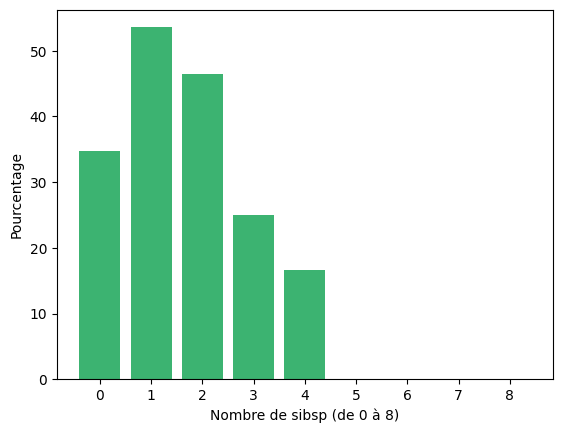

In [10]:
# Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs frères, soeurs ou époux à bord
mod_sibsp = np.unique(sibsp)
taux_survie_par_sibsp = {}

for mod in mod_sibsp:
    total_mod = titanic[sibsp == mod]
    survivants_mod = titanic[np.logical_and(sibsp == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_sibsp[mod] = taux
    print('Pourcentage pour' ,mod, 'sibsp: ',round(taux_survie_par_sibsp[mod],2),' %')


plt.bar(mod_sibsp, taux_survie_par_sibsp.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de sibsp (de 0 à 8)')
plt.xticks(np.arange(9)); 

# on voit par exemple que lorsqu'un passager a 1 époux, frère ou soeur au total son chance de survie est de 60%

On voit que les familles de petite taille ont statistiquement plus de chance pour survivre

#### Proposition d'une variable famille

Text(0.5, 1.0, 'Taux de survie en fonction de la taille de la famille')

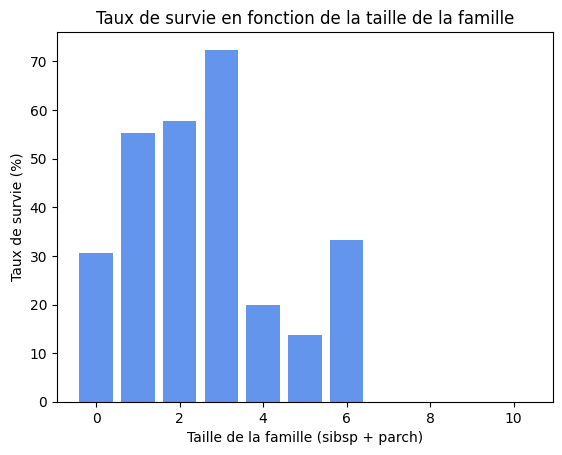

In [11]:
famille = parch + sibsp
mod_famille = np.unique(famille)
taux_survie_famille = {}

for mod in mod_famille:
    total_mod = np.sum(famille == mod)
    survivants_mod = np.sum(np.logical_and((famille==mod),(survie == 1)))
    taux = survivants_mod / total_mod * 100
    taux_survie_famille[mod] = taux

plt.bar(mod_famille, taux_survie_famille.values(), color='cornflowerblue')
plt.xlabel("Taille de la famille (sibsp + parch)")
plt.ylabel("Taux de survie (%)")
plt.title("Taux de survie en fonction de la taille de la famille")


### **Description de la variable 'fare'**

512.3292


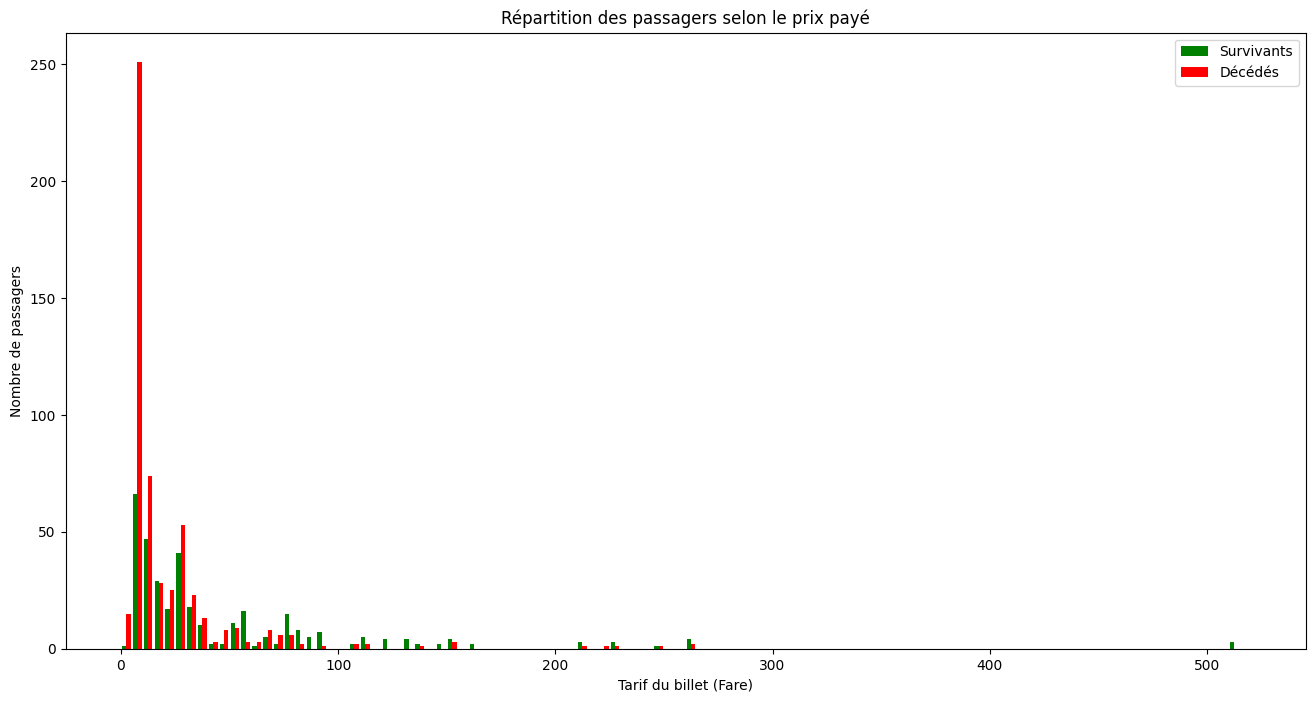

In [12]:
# Choisir les tranches de prix
bins = np.arange(0, np.max(fare)+10, 5)  # par tranches de 20
print(np.max(fare))
# Histogramme groupé pour morts et survivants
plt.figure(figsize=(16, 8))
plt.hist([fare[vivants], fare[morts]],
         bins=bins,
         color=['green', 'red'],
         label=['Survivants', 'Décédés'])

plt.xlabel("Tarif du billet (Fare)")
plt.ylabel("Nombre de passagers")
plt.title("Répartition des passagers selon le prix payé")
plt.legend()


#### Manquant


In [13]:
print("Statistiques descriptives sur 'fare' :")
print("Prix moyen :", np.mean(fare))
print("Prix médian :", np.median(fare))
print("Prix minimum :", np.min(fare))
print("Prix maximum :", np.max(fare))
print("Écart-type :", np.std(fare))


Statistiques descriptives sur 'fare' :
Prix moyen : 32.30542018038331
Prix médian : 14.4542
Prix minimum : 0.0
Prix maximum : 512.3292
Écart-type : 49.7539704569215


In [14]:
print("Moyenne 'fare' des survivants :", np.mean(fare[vivants]))
print("Moyenne 'fare' des morts :", np.mean(fare[morts]))


Moyenne 'fare' des survivants : 48.39540760233918
Moyenne 'fare' des morts : 22.208584036697246


Interprétation : la moyenne des survivants est significativement plus élevée, cela peut indiquer un lien entre richesse et survie.

## ACP

(887, 6)


Text(0.5, 1.0, 'Matrice de covariance')

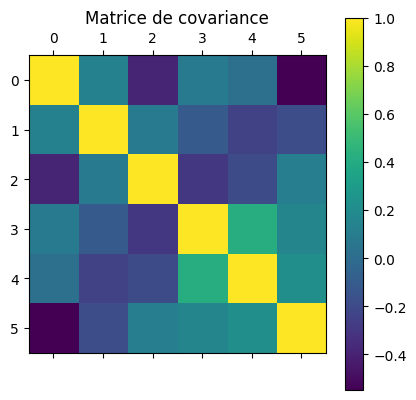

In [15]:
print(X.shape)
#Centrage et réduction des données 
Xc = X-np.mean(X,axis=0)
Xr = Xc/np.std(X,axis=0)

#Matrice de Correlation 
cov = (1/n) * (Xr.T@Xr)
plt.matshow(cov)
plt.colorbar()
plt.title("Matrice de covariance")

[0.36141775 0.54311271 0.66873197 0.87321054 1.76103147 1.79249558] [[ 0.72148598 -0.04928199 -0.16041988  0.0717065  -0.58800443 -0.31686541]
 [-0.07918166 -0.24786822  0.02632747 -0.87632493  0.02707931 -0.40363325]
 [ 0.28823695  0.29119461 -0.70196194 -0.06361422  0.56950706 -0.10483096]
 [-0.0277079   0.70982104 -0.04229718 -0.41148836 -0.3668403   0.43554889]
 [-0.15195586 -0.54791431 -0.5770222  -0.09277694 -0.27029305  0.51193633]
 [ 0.60518542 -0.21744499  0.38220162 -0.21198066  0.34863889  0.52335966]]


<BarContainer object of 6 artists>

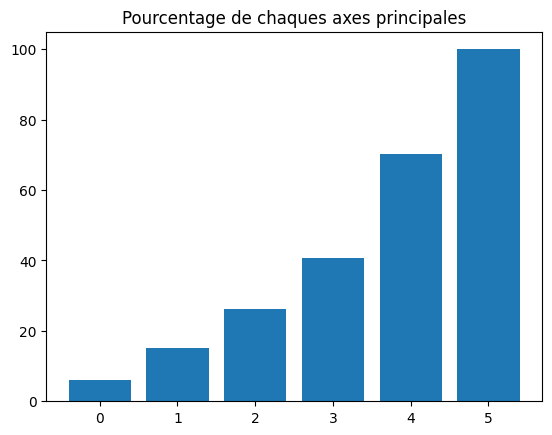

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print(eigenvalues, eigenvectors)

var_explique = np.cumsum((eigenvalues/ np.sum(eigenvalues))) * 100
plt.title('Pourcentage de chaques axes principales' )
plt.bar(range(len(var_explique)) , var_explique)

## Tests statistiques 

### **Test statistique Famille**

Objectif renier ou non ces hypothèses : 

\begin{equation}
 \begin{cases}
    H_0 : \text{Taille de la famille est indépendant avec survie}\\
    H_1 : \text{Taille de la famille dépendant avec survie}
  \end{cases}
\end{equation}

Loi du $chi2$

#### Tableau de contingence
$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 tailleFamille = 0 & ... &  ...  \\
 \hline
 tailleFamille = 1 &  ...  &  ... \\
 \hline
    tailleFamille = 2 &  ...  &... \\
\hline
tailleFamille = ... & ...  & ...\\
 \hline
 

\end{array}
$$

In [ ]:
# print(sibsp.shape)
# print(parch.shape)

#Création du groupe famille 
tailleFamille = 1+sibsp +parch

#Affichage des différentes tailles de familles
modalite, effectif = np.unique(tailleFamille ,return_counts=True)

#Initilisation du tableau de contingence 
tab_cont_famille = np.zeros((len(modalite),2))

#Remplissage du tableau de contingence 
print('Tableau de contingence initiale: ')
for s in range(2):
    for f in range(len(modalite)) :
        tab_cont_famille[f,s] = np.sum(np.logical_and((tailleFamille == modalite[f]),(survie == s) ))

print(tab_cont_famille)
#Pour veiller à un bon test du chi2 (effectif >5 pour chaques éléments du tableau)
taille_reduit = len(modalite)-4
tab_cont_famille_2 = np.zeros((taille_reduit , 2))
print(tab_cont_famille_2.shape)


#Remplissage du tableau de contingence du test 
#Regroupement des modalités
print('Tableau de contingence test: ')
for s in range(2):
    for f in range(taille_reduit) :
        tab_cont_famille_2[f,s] = tab_cont_famille[f,s]

tab_cont_famille_2[taille_reduit-1,0] = (tab_cont_famille_2[taille_reduit-1,0] + np.sum(tab_cont_famille[taille_reduit:,0]))
tab_cont_famille_2[taille_reduit-1,1] = (tab_cont_famille_2[taille_reduit-1,1] + np.sum(tab_cont_famille[taille_reduit:,1]))
print(tab_cont_famille_2)


Tableau de contingence initiale: 
[[370. 163.]
 [ 72.  89.]
 [ 43.  59.]
 [  8.  21.]
 [ 12.   3.]
 [ 19.   3.]
 [  8.   4.]
 [  6.   0.]
 [  7.   0.]]
(5, 2)
Tableau de contingence test: 
[[370. 163.]
 [ 72.  89.]
 [ 43.  59.]
 [  8.  21.]
 [ 52.  10.]]


In [25]:

marg_l = np.sum(tab_cont_famille_2 , axis=1)/ (np.sum(tab_cont_famille_2))
marg_c = np.sum(tab_cont_famille_2 , axis=0)/ (np.sum(tab_cont_famille_2))
# marg_l,marg_c

#Creation d'un tableau sous hypothèse d'indépendance
print('')
print('Tableau indépendant :' ) 
tab_th_famille = np.outer(marg_c,marg_l).T * (np.sum(tab_cont_famille_2))
print(tab_th_famille)
#Calcul du chi2
chi_2 = np.sum((tab_cont_famille_2 - tab_th_famille)**2/(tab_th_famille))
print('chi2')
print(chi_2)

#Vérification de la valeur du chi2
from scipy.stats import chi2_contingency 

chi2_check, pvaleur, ddl, tab_th_check = chi2_contingency(tab_cont_famille_2)
print(chi2_check) #Meme valeur bonne estimation du chi2

#p-valeur
print('p-valeur')
print(pvaleur)
print('ddl')
print(ddl)


Tableau indépendant :
[[327.49154453 205.50845547]
 [ 98.92333709  62.07666291]
 [ 62.67192785  39.32807215]
 [ 17.81848929  11.18151071]
 [ 38.09470124  23.90529876]]
chi2
76.52552019205021
76.5255201920502
p-valeur
9.477095441215173e-16
ddl
4


### Conclusion 

La p-valeur $9.477095441215173e-16 <  0.05$ nous pouvons rejeter $H_0$



### **Test statistique class - chi2**

$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 class = 1 & ... &  ...  \\
 \hline
 class = 2 &  ...  &  ... \\
 \hline
    class = 3 &  ...  &... \\
\hline

 

\end{array}
$$

In [33]:
mod, eff = np.unique(pclass,return_counts=True)


tab_cont_class = np.zeros((len(mod),2))
for s in range(2):
    for c in range(len(mod)) :
       tab_cont_class[c,s] = np.sum(np.logical_and((pclass == mod[c]),(survie == s) ))
print("tableau de contingence de class/survie ")
print(tab_cont_class)

tableau de contingence de class/survie 
[[ 80. 136.]
 [ 97.  87.]
 [368. 119.]]


In [34]:
print(chi2_contingency(tab_cont_class))

Chi2ContingencyResult(statistic=np.float64(101.21674250560609), pvalue=np.float64(1.0496962042983217e-22), dof=2, expected_freq=array([[132.71702368,  83.28297632],
       [113.05524239,  70.94475761],
       [299.22773393, 187.77226607]]))


### **Test statistique Prix du billet**

In [ ]:
# print(np.unique(fare))
# #Catégorisation de fare (faible, moyen, eleve,tres eleve)
# print(np.percentile(fare,0))
# categorie = []
# for i in range(0,125,25):
#     categorie.append(i)
# print(categorie)

# tab_cont_fare = np.zeros((4,2))
# for s in range(2):
#     for c in range(1,4)  :
#        tab_cont_fare[c,s] = np.sum(np.logical_and(np.logical_and((fare<=np.percentile(fare,categorie[c])), (fare>=np.percentile(fare,categorie[c-1]))) \
#                                                                  ,(survie == s)))

# print(tab_cont_fare)
# print(np.sum(tab_cont_fare))
# print(chi2_contingency(tab_cont_fare))


[  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5     15.55
  15.7417  15.75    15.85    15.9     16.      16.1     16.7  

ValueError: The internally computed table of expected frequencies has a zero element at (np.int64(0), np.int64(0)).

# Regression

# Fonction de régression


In [47]:
#Foction reprise de la correction du TP
def ma_reg(X,y):
    '''
    X : numpy array de dimention n x p
    y : numpy array de dimention n
    '''
    n,p = X.shape
    m = np.prod(y.shape)
    if n != m:
        raise Exception('X doit etre une matrice de n lignes et p colonnes et y un vecteur de n lignes')
        
    a = np.linalg.solve(X.T@X,X.T@y)
    z = X@a
    e = y - z # z - y
    s2 = np.sum(e**2)/(n-p-1)
    SCT = np.sum((y-np.mean(y))**2)
    SCE = np.sum(e**2)
    R2 = 1 - SCE/SCT
    H = X@np.linalg.solve(X.T@X,X.T)  # plus stable et plus rapide
    h = np.diag(H)
    c = h/((1-h)**2)*(e**2)/(p*s2)
    
    dv = np.stack([e, h, c])
    
    return a, s2, R2, dv

X_reg = np.column_stack((np.ones((n,1)),X))
a, s2, R2, diagd = ma_reg(X_reg,y)
e = diagd[0,:]
h =diagd[1,:]
c =diagd[2,:]
R2

np.float64(0.39749298971397795)

array([[1.        , 0.59828797, 0.99882283, ..., 0.37379676, 0.78509996,
        0.99626991],
       [0.59828797, 1.        , 0.59188827, ..., 0.95972788, 0.9649774 ,
        0.5392983 ],
       [0.99882283, 0.59188827, 1.        , ..., 0.3690632 , 0.78015649,
        0.99696256],
       ...,
       [0.37379676, 0.95972788, 0.3690632 , ..., 1.        , 0.85798702,
        0.30484778],
       [0.78509996, 0.9649774 , 0.78015649, ..., 0.85798702, 1.        ,
        0.74008572],
       [0.99626991, 0.5392983 , 0.99696256, ..., 0.30484778, 0.74008572,
        1.        ]])

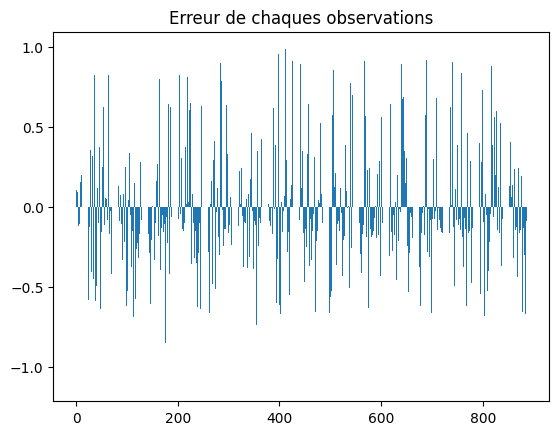

In [48]:
plt.bar(range(n),e)
plt.title('Erreur de chaques observations')
np.corrcoef(X_reg)

## Levier de chaque observations

Text(0.5, 1.0, 'Effet levier de chaques observations')

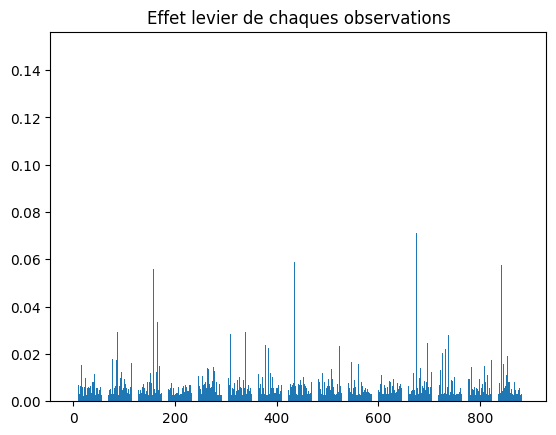

In [52]:
plt.bar(range(n),h)
plt.title('Effet levier de chaques observations')

### Etude de la contribution

Text(0.5, 1.0, 'Etude de la contributions des observations ')

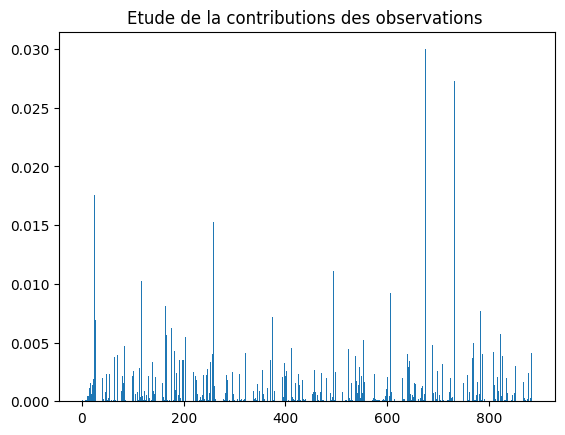

In [53]:
plt.bar(range(n),c)
plt.title('Etude de la contributions des observations ')

Valeur sortant du lot 

In [54]:
print(np.where(c == max(c)))
print(titanic[np.where(c == max(c)),:])

(array([676]),)
[[[  1.       1.       1.      36.       0.       1.     512.3292]]]
